# GitHub Repository Impact and Collaboration Network
- Author: Yuzhou Wu

## 1. Introduction
This project focuses on analyzing the co-commit network to derive insights on influence of github developers in terms of their projects. Being able to evaluate an individual scholar’s scientific influence quantitatively can benefit in multiple ways. For example, the developers can evaluate the validity of repositories based on the owner's influence. Also, the project owners can filter out the pull requests from influential developers or look for impactful users as their social coding collaborators. In addition to the traditional impact metrics of github developers, this project analyzes the graph metrics derived from the importance of developers in their co-commit networks. For both impact metrics and the co-commit network analyses, we can derive insights of impact of developers in the social coding environment across all programming languages.

The paper has three main research questions:
- **RQ1**: How are developers distributed in terms of programming languages?
- **RQ2**: What are the unique features of the collaboration pattern of developers in the social coding network?
- **RQ3**: What is the correlation between developer’s position in the co-commit network and influence metrics that can imply the popularity of the developer’s repositories?


## 2. Reproduction Plan Mapping to the Original Paper

### Data Mapping
**Original Paper:**
- Author profiles:
    - Academic Titles
    - Country
- Citation Metrics:
    - h-index
    - g-index
- Co-authorship network:
    - vertices: google scholars
    - edges: two scholars having published at least one paper together

**Reproduced Paper:**
- Developer profiles:
    - Primarily used programming languages
- Developer Impact Metrics:
    - Average pageranks of fork information of the all repositories owned by the developer
    - repository-impact metrics (GH-impact, similar to h-index but for github repositories [7]) of the developer
- Co-commit network:
    - vertices: Github developers
    - edges: two developers having commited to at least one repository together



### Scalable Analysis Mapping
**Original Paper:**
- Demographic Analysis:
    - Author distribution in terms of scientific labels, countries, and academic labels
- Co-authorship network analysis:
    - Degree: The degree of a node in a network denotes the number of edges connected to the node. For an author in G, the degree represents the number of co-authors
    - Clustering coefficient: The clustering coefficient (CC) of a node is defined as the fraction of pairs of the node’s neighbors that are directly connected with each other
    - PageRank: an estimate the importance of the nodes in a network. It has been used by the Google Search Engine to rank webpages in its search results
    - Connected components: A connected component is a subgraph in which any two nodes are connected to each other by paths. In addition, any node in this subgraph is not connected to any additional node in the supergraph.
- Comparison among different author groups:
    - analyze the network metrics of co-authorship network with respect to different author groups divided by countries, scientific labels and academic titles
- Co-authorship network and citation metrics
    - the correlation between the pagerank of co-authorship network and the h-index and g-index

**Reproduced Paper:**
- Demographic Analysis:
    - Developer distribution in terms of primarily used programming languages because the programming language is the only available data in the Github dataset that can be mapped to the orignial demographic analysis
- Co-commit network analysis:
    - Degree: the degree represents the number of co-committers 
    - CC: the direct connectivity of paris of node's neighbors of a developer
    - PageRank: used to reflect the impact or importance of a developer in the co-commit network
    - Connected components: another metric reflecting the connectivity of the network. The network can have different distribution of largely connected or sparsely connected components
- Comparison among different developer groups:
    - the network metrics across different programming languages will be analyzed
- Co-commit network and repository-owner impact metrics
    - the correlation between the pagerank of the co-commit network and the GH-impact



## 3. Project Plan $[56.5 hrs/ 51.5 hrs]$
Acutal vs. planned time for each task is denoted as _[actual hours/planned hours]_
### Version 1 $[22hrs/ 17.5hrs]$
- Data Understanding $[6.5hrs/ 5hrs]$
    - Initial data ingestion $[1.5 hrs/ 1 hrs]$
    - Describe and assess the data selected from the database $[ 5hrs/ 4hrs]$
- Data Preparation $[14hrs/ 11hrs]$
    - Data transformation (structure, enrich, clean) $[ 9 hrs/ 6 hrs]$
    - Construct data: test run of the scalable analysis to be implemented using a test dataset $[5hrs/ 5 hrs]$
- Initial Project Plan (PV1) $[1hrs/ 1hrs]$
    - Detailed breakdown of tasks to be completed with time estimations $[1 hrs/ 1 hrs]$
- Accurate Report of Time Spend on Each Task in V1 $[ 0.5 hrs/ 0.5 hrs]$

### Version 2 $[21 hrs/ 19hrs]$
- Data Preparation $[12 hrs/ 10hrs]$
    - Finalize data selection and ingestion $[6 hrs/ 5hrs]$
    - Complete data tranformation $[6 hrs/ 5hrs]$
- Implementation of Scalable Analyses $[9 hrs/ 6hrs]$
    - Demongraphic analysis of the distribution authors in terms of language labels $[5 hrs/ 2hrs]$
    - Generate repository impact metric based on pagerank from GitHub fork information to evaluate the impact of GitHub repositories $[4 hrs/ 4hrs]$
    
### Version 3 $[12 hrs/ 13 hrs]$
- Implementation of Scalable Analyses $[8 hrs/ 7hrs]$
    - construct the co-commit network analysis $[4 hrs/ 4 hrs]$
    - compute the graph metric for repository impact $[4 hrs/ 3hrs]$
- Assessment of Scalable Analyses $[2 hrs/ 3 hrs]$
    - Finalising the co-commit network analysis $[1 hrs/ 1.5 hrs]$
    - Comparison and correlation between repository impact metric to the graph metric $[1 hrs/ 1.5 hrs]$
- Evalute Results and Discussion $[1 hrs/ 1.5 hrs]$
- Reivew the process and the project $[1 hrs/ 1.5 hrs]$

### Version 4 $[1.5 hrs/ 2 hrs]$
- Produce the Final Report $[1.5hrs/ 2 hrs]$

In [ ]:
# set up pyspark environment
# The latest pip release of pyspark (pyspark 2.3.2 - 2.4.4 at time of writing) doesn't support python 3.8. Downgrade to python 3.7

import sys
print("My Python version is:" , sys.version)

# !pip install --user pyspark findspark
import os
os.environ["HADOOP_HOME"] = "C:/Courses/MIE1512/Material/Spark/winutils/"
os.environ["JAVA_HOME"] = "C:/progra~2/Java/jdk1.8.0_221/"
os.environ["JRE_HOME"] = "C:/progra~2/Java/jdk1.8.0_221/jre/"

import findspark
findspark.init("C:/Courses/MIE1512/Material/Spark/spark-2.3.2-bin-hadoop2.7/")

import pyspark
sc = pyspark.SparkContext(appName="myAppName")
spark = pyspark.sql.SQLContext(sc)

In [ ]:
os.getcwd()

In [ ]:
# import libraries:
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.sql.types import *
from datetime import datetime
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from graphframes import GraphFrame

## 4. Data Understanding
###  4.1 Data Ingestion
The data was collected from GHTorrent. GHTorrent uses GitHub REST API to monitor the GitHub public events and create high quality raw data and data with linked entities, which allows researchers to derive insights from repositories and activities on GitHub. For this project, ght_2018_04_01 will be selected from the ghtorrent-bq project.

The detailed descriptions of tables of interest are selected from the original dataset. Each table with selected attributed are shown in the following:
- ghtorrent-bq.ght_2018_04_01.projects
    * id: project id
    * owener_id: project owener's user ID
    * language: the primary language at collection time
    * created_at: date when the project was created
    * forked_from: id of the project the project is forked from or empty if the porject is not forked
    * deleted: whether the project has been deleted from Github. Deleting the source reposotory will delete the original commits
    * updated_at: date of the last full update was done for this project
- ghtorrent-bq.ght_2018_04_01.commits
    * id: commit id
    * committer_id: the id of the user who made the commit
    * project_id: project that this commit has been first associated with. This might not be the project this commit was initially pushed to, e.g. in case the fork is processed before the parent, so the table "project_commit" is nedded
    * created_at: date when the commit was created
- ghtorrent-bq.ght_2018_04_01.project_commits
    * commit_id: unique commit id, note that one commit can be shared by multiple projects if one is forked from another
    * project_id: project id
- ghtorrent-bq.ght_2018_04_01.users
    * id: user id
    * login: username
    * company:  the company of the user
    * created_at: the date the user created the account
    * type: individual user or organization user (org user cannot make commits but can own projects)
    * fake: users are fake if they cannot own repositories or conduct actions but appear as authors or commiters
    * deleted: the user was once active on GitHub but GHTorrent can no longer get his/her details
- ghtorrent-bq.ght_2018_04_01.project_members
  * repo_id: project id
  * user_id: user id
  * created_at: only filled in accurately for memberships for which GHTorrent has recorded a corresponding event. Otherwise, it is filled in with the latest date that the corresponding user or project has been created
- ghtorrent-bq.ght_2018_04_01.watchers:
    * repo_id: repository id
    * user_id: id of user who has starred or watched the project
    * created_at: date when the user starred or watched the project, note that it is only filled in accurately for starrings for which GHTorrent has recorded a corresponding event. Otherwise, it is filled in with the latest date that the corresponding user or project has been created.
- ghtorrent-bq.ght_2018_04_01.pull_request
    * id: pull request id attribute of the pull_request table, the same as the output from the pull_request_id operation from the table 'issues', 'pull_request_commits', and 'pull_request_history' 
    * head_repo_id: the repository id that the pull request is from
    * base_repo_id: the repository id that the pull request is targeting at
    * pullreq_id: Github's pull request unique identifier
    * intra_branch: boolean attribute that signifies that the head and base repositories are the same

### 4.2 Describe and Assess the Data

#### Basic Questions to Assess Structure
**1. Do all records in the dataset contain the same fields?**

Through inspection, all records in the ghtorrent tables contain the same fields (i.e., the datasets are rectangular that can be ingested as tables of fixed number of rows and columns)
   
**2. How can you access the same fields across records? By position? By name?**

Using the field names (column names) allows accessing across records (rows)
   
**3. How are the records delimited/separated in the dataset? Do you need sophisticated parsing logic to separate the records from one another?**

The records are seperated by comma as '.csv' files, so no further parsing processes are needed.
   
**4. How are record fields encoded? Human readable strings? Binary numbers? Hash keys? Compressed? Enumerated codes?**

All fields are encoded in human readabe strings

#### Basic Questions to Assess Data Granuality
**1. What kind of thing (person, object, relationship, event, etc.) do the records represent?**

The records represent the total weekly number of "events" - the number of users who have starred a repository in a given week.

A single record in the tables from ghtorrent dataset represents a single user, project, event (e.g., commit and PR). In watchers table, a single record represents the weekly number of stars received by a repository. 
   
**2. Are the records homogeneous (represent the same kinds of things)? Or heterogeneous?**

All records in the same table represent the same kinds of things, so they are homogeneous.
   
**3. What alternative interpretations of the records are there? For example, if the records appear to be customers, could they actually be all known contacts (only some of which are customers)?**

The user records can be either individual users or organizations. Individual users can own and act on projects while organizations can only own projects. In the watchers table, the watchers and stars are interchangable interpretations.

#### Basic Questions to Assess Data Accuracy
**1.Date Times**

All date time entities are encoded in TIME STAMPS in UTC. null entries in the 'created_at' fields are filled with the latest date that the corresponding user or project has been created [5].

**2. Mechanisms that produce the data**

GHTorrent uses GIT REST API to monitor the Github events and retrieve the data for sync operations in a distributed manner. There no human errors such as mis-spellings and nonstandard abbreviations. However, like most data sync operations over unreliable networks, the process is subject to network and system disturbances that can result in inevitable inconsistancies and voids in data collection

#### Basic Questions to Assess Data Temporality
**1.When was the dataset collected?**

The GHTorrent dataset was collected from September 2016.
   
**2. Were all the records and record fields collected/measured at the same time? If not, is the temporal range significant?**

No, they were not. The temporal range is significant. If the temporal range is too narrow, there would be not enough data to analyse the network pattern of co-commitment or reposiotry impact through star or fork information. In addition, the overlapped periods of different users' first and last commits on the same projects might be used to determine if they ever collaborate on the same proeject during that time.
   
**3. Are the timestamps associated with collection of the data known and available (as a record field) or as associated metadata?**

Yes, they are recorded in the 'created_at' columns with uniform TIMESTAMPs in the UTC timezone.

**4. Have some records or record field values been modified after the time of creation? Are the timestamps of these modifications available?**

Yes, some records are. For example, if the source project is deleted some time after creation, the associated commits will also be deleted. No, the timestamps of the deletions are not available but the existance of the project status is flagged by the boolean variable 'deleted', so these deleted projects are excluded for analyses.

**5. In what ways can you determine if the data is “stale”? For example, you might have purchased a marketing leads database and want to verify the contact information for the people represented in the dataset. Is it sufficient to sample the records and manually verify the data? Can you automatically verify it by using third-party services?**

Similar to the way that GHTorrent dataset was acquired, we can use the GitHub REST API to collect data, for example, repository id, user login, and organization, and draw a random sample for manual verification on the GitHub database.

**6. If there are conflicting values in the data (i.e. multiple mailing addresses for a person), can you use timestamps to determine which value is "correct"**

No, there are no conflicting values. Combining the information from the 'deleted' and 'created_at' fields, we can identify the valid adn correct records

#### Basic Questions to Assess Data Scope
**1.Given the granularity of the dataset, what characteristics of the things (i.e. people, objects, relationships, events, etc.) represented by the records are captured by the record fields? What characteristics are not captured?**

The activities/relationship between repositories-and-repositories (e.g., fork information) and events between users-and-repositories (e.g., starring, commits, etc.) are captured by  the record fields.
   
**2. Are the record fields consistent? For example, does the customer's age field make sense relative to the date-of-birth field? If the record corresponds to a purchase transaction, does the cost of the listed set of purchased items add up to the total transaction amount?**

Yes, the record fields are consistent.
   
**3. For the analysis you want to perform, can you deduce or infer additional relevant characteristics from the ones that you want? For example, can you infer the demographics of the people in a household from partner and dependents record fields?**

We can infer if the developers are active and primary contributers to a certain repository through the query algorithm based on commit counts. Also, by inspecting the overlap periods of commits of different users on the same proejct, their collaboration relationships can be deduced.

**4. Are the same record fields available for all records? Are they accessible via the same specification (position, name, etc.)?**

Yes, the same records are available for all records. All the associated records can be accessed by querying under the field name.

**5. Do the record in the dataset represent the entire population of associated things (people, objects, relationships, events, etc.)? Are these missing records (e.g., things in the population, say people, with no associated record)? Are the missing records randomly missing or systematically missing?**

No, the record in the dataset represents only the fraction of population as the GHTorrent collects the timeline of events and activities on GitHub since the start time. Due to the disturbances in network during the data sync operation, inevitable spurious inconsistency in data collection are expected

## 5. Data Preparation

### 5.1 Data Selection

#### Select active repositories  
To analyze the impact of a repository, it needs to be active. Kalliamvakou et al. discovered that most repositories are inactive that the activity can be measured by the time since the last commit or pull request(PR) [3].

To select the active repositories, we can run the followin process on GHTorrent from the whole population:

1. exclude repos that received no commits for the past year from the date of creation of the dataset ($A$)
2. from $A$, exclude repos that never received a PR ($B$)

1. create table `active_commit_projects` that contains all projects not deleted and having commits within a year

In [4]:
'''
SELECT
  project_id,
  owner_id,
  forked_from,
  project_language,
  project_created_at,
  last_commit_date
FROM (
  SELECT
    c.project_id AS project_id,
    c.created_at AS last_commit_date,
    p.forked_from AS forked_from,
    p.language AS project_language,
    p.owner_id AS owner_id,
    p.created_at AS project_created_at,
    ROW_NUMBER() OVER (PARTITION BY project_id ORDER BY c.created_at DESC) AS commit_date_rank
  FROM
    `ghtorrent-bq.ght_2018_04_01.commits` AS c
  JOIN
    `ghtorrent-bq.ght_2018_04_01.projects` AS p
  ON
    c.project_id = p.id
  WHERE
    (c.created_at BETWEEN TIMESTAMP(DATE_ADD(DATE '2018-04-01', INTERVAL -1 YEAR)) AND TIMESTAMP("2018-04-01"))
    AND p.deleted = false
)
WHERE
  commit_date_rank = 1
ORDER BY
  last_commit_date desc
''';

2. create table `active_projects` that have recent commits and at least one PR associated with them

In [5]:
'''
SELECT
  DISTINCT project_id,
  owner_id,
  forked_from,
  project_language,
  project_created_at,
  last_commit_date
FROM 
  `mie1512github.ght.active_commit_projects` acp
INNER JOIN 
  `ghtorrent-bq.ght_2018_04_01.pull_requests` pr
ON 
  acp.project_id = pr.base_repo_id
''';

In [4]:
# ingest active projects as spark dataframe
# Load active_projects.csv
active_projectsDF = spark.read.csv(os.getcwd()+"/active_projects.csv",
                                   header=True,
                                   inferSchema=True,
                                   mode="DROPMALFORMED")
active_projectsDF.createOrReplaceTempView("active_projects")

3. Create table `project_commit_counts` to find commit counts for each projects 

In [10]:
'''
SELECT  
    pc.project_id project_id,
    count(1) commit_count
FROM `ghtorrent-bq.ght_2018_04_01.project_commits` pc
GROUP BY pc.project_id
''';

In [11]:
# ingest project_commit_counts as spark dataframe
# Load project_commit_counts.csv
project_commit_countsDF = spark.read.csv(os.getcwd()+"/project_commit_counts.csv",
                                   header=True,
                                   inferSchema=True,
                                   mode="DROPMALFORMED")
project_commit_countsDF.createOrReplaceTempView('project_commit_counts')

4. Merge the table `project_commit_counts` and `active_projects` to add the field of commit counts to active projects table

In [12]:
'''
SELECT  
    *
FROM 
    `mie1512github.ght.active_projects` ap
JOIN `mie1512github.ght.project_commit_counts` pcc
ON ap.project_id = pcc.project_id
ORDER BY pcc.commit_count desc 
''';

The query result was acquired and compared to the result from joining two tables in step 3 and 4, and they were verified to be the same. However, I would like to conduct exploratory anaylsis on originial commit counts and commit counts for only active projects, so this project proceeded with the latter method

In [13]:
active_project_commitsDF = spark.sql('''
SELECT
    ap.project_id, 
    ap.project_id, 
    ap.forked_from, 
    ap.project_language, 
    ap.project_created_at,
    ap.last_commit_date,
    pcc.commit_count
FROM 
    active_projects ap
JOIN  project_commit_counts pcc
ON ap.project_id = pcc.project_id
ORDER BY pcc.commit_count desc 
''')
active_project_commitsDF.createOrReplaceTempView('active_project_commits')

5. Get table `active_project_info` that contains the basic url, repo name, owner name information of active projects

In [14]:
'''
SELECT  a.owner_id,
    a.id,
    a.name repo_name,
    a.url,
    u.login owner_login
FROM `ghtorrent-bq.ght_2018_04_01.projects` a , `ghtorrent-bq.ght_2018_04_01.users` u,`mie1512github.ght.active_projects` ap
WHERE u.id = a.owner_id AND ap.project_id = a.id
''';

In [15]:
active_project_infoDF = spark.read.csv(os.getcwd()+"/active_project_info.csv",
                                   header=True,
                                   inferSchema=True,
                                   mode="DROPMALFORMED")
active_project_infoDF.createOrReplaceTempView('active_project_info')

#### Select active users

create table `real_committers` that eliminates fake users and those who commit less than once or not work on the active active projects, it returns (user info, project id, lastest commit, oldest commit, commit counts)

- query restuls from `ghtorrent` dataset

In [13]:
'''
SELECT 
    login,
    user_id,
    user_type,
    project_id,
    latest_commit,
    oldest_commit,
    commit_count
FROM
    (SELECT
        u.login AS login,
        u.id AS user_id,
        u.type AS user_type,
        pcc.commit_id AS commit_id,
        pcc.project_id AS project_id,
        MAX(pcc.created_at) OVER (PARTITION BY pcc.project_id, u.id, u.login) AS latest_commit,
        MIN(pcc.created_at) OVER (PARTITION BY pcc.project_id, u.id, u.login) AS oldest_commit,
        COUNT(pcc.created_at) OVER (PARTITION BY pcc.project_id, u.id, u.login) AS commit_count
    FROM(
        SELECT 
        pc.project_id project_id,
        c.committer_id committer_id,
        pc.commit_id commit_id,
        c.created_at created_at
        FROM `ghtorrent-bq.ght_2018_04_01.commits` AS c
        JOIN `ghtorrent-bq.ght_2018_04_01.project_commits` AS pc
        ON c.id = pc.commit_id
        WHERE pc.project_id IN (
            SELECT project_id
            FROM `mie1512github.ght.active_projects`
        )
    ) pcc
    JOIN
        `ghtorrent-bq.ght_2018_04_01.users` AS u
    ON
        pcc.committer_id  = u.id
    WHERE u.fake = false 
        AND u.deleted = false   )
GROUP BY     
    login,
    user_id,
    user_type,
    project_id,
    latest_commit,
    oldest_commit,
    commit_count
ORDER BY commit_count desc
''';

#### Ingest Star Counts per Repository

Create table `project_stars` that records the number of stars received for each project

In [14]:
'''
SELECT  
    DISTINCT w.repo_id project_id,
    count(1) OVER (PARTITION BY w.repo_id) AS star_count ,
    MAX(w.created_at) OVER (PARTITION BY w.repo_id) AS latest_star_date,
    MIN(w.created_at) OVER (PARTITION BY w.repo_id) AS oldest_star_date
FROM 
    `ghtorrent-bq.ght_2018_04_01.watchers` w
ORDER BY star_count desc
''';

### 5.2 Exploratory Analyses

#### 5.2.1 Exploratory Analysis on Active Projects

In [15]:
active_projectsDF.printSchema()
print("number of active projects: ",active_projectsDF.count())

root
 |-- project_id: integer (nullable = true)
 |-- owner_id: integer (nullable = true)
 |-- forked_from: integer (nullable = true)
 |-- project_language: string (nullable = true)
 |-- project_created_at: string (nullable = true)
 |-- last_commit_date: string (nullable = true)

number of active projects:  2166288


**Comment:** There are only 2166288 active projects (around 2.5% of 83624114 projects in the entire dataset) that have commit actions within the year of the date of data collection and at least one pull request, which brought us a subset of data we can focus our analysis on. There were 18838050 projects (22.5% of the total projects) having commits in the recent year at that time, and 2166288 active projects (11.5% of those having commits lately) have at least one PR.

In [16]:
active_project_infoDF.printSchema()

root
 |-- owner_id: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- repo_name: string (nullable = true)
 |-- url: string (nullable = true)
 |-- owner_login: string (nullable = true)



Join `active_project_info` with `active_projects` for a table with more detailed information 

In [16]:
active_projectsDF = spark.sql('''
SELECT ap.project_id,
    repo_name,
    api.owner_id,
    owner_login,
    url,
    forked_from,
    project_language,
    project_created_at,
    last_commit_date
FROM active_projects AS ap, active_project_info AS api
WHERE ap.project_id = api.id
''')
active_projectsDF.createOrReplaceTempView('active_projects')

In [18]:
active_projectsDF.limit(5).toPandas()

,project_id,repo_name,owner_id,owner_login,url,forked_from,project_language,project_created_at,last_commit_date
0,471,AugustPenguin,3969,tomer,https://api.github.com/repos/tomer/AugustPenguin,486.0,HTML,2012-07-09 08:24:08 UTC,2017-09-23 21:38:08 UTC
1,496,hubot,142,github,https://api.github.com/repos/github/hubot,NaN,CoffeeScript,2011-08-27 08:30:59 UTC,2017-06-12 08:08:54 UTC
2,833,redis-doc,5260,antirez,https://api.github.com/repos/antirez/redis-doc,NaN,Ruby,2010-09-16 15:34:02 UTC,2018-03-21 12:36:31 UTC
3,1088,linux,5203,torvalds,https://api.github.com/repos/torvalds/linux,NaN,C,2011-09-04 22:48:12 UTC,2018-03-31 04:53:57 UTC
4,1591,antlrcs,8795,antlr,https://api.github.com/repos/antlr/antlrcs,NaN,C#,2010-01-08 22:11:56 UTC,2018-02-19 20:15:56 UTC


In [17]:
commit_countsDF = spark.sql('''
SELECT commit_count, count(1) AS num_of_repos
FROM project_commit_counts
GROUP BY commit_count
ORDER BY commit_count asc
''')
commit_countsDF.createOrReplaceTempView('commit_counts')

In [20]:
commit_countsDF.count()

42800

In [21]:
commit_countsDF.show(10)

+------------+------------+
|commit_count|num_of_repos|
+------------+------------+
|           1|    22937971|
|           2|     8223927|
|           3|     5039510|
|           4|     3186556|
|           5|     2371735|
|           6|     1881634|
|           7|     1507865|
|           8|     1255023|
|           9|     1086349|
|          10|      921002|
+------------+------------+
only showing top 10 rows



In [22]:
spark.sql('''
SELECT 
    sum(num_of_repos)
FROM (
    SELECT *
    FROM commit_counts
    WHERE commit_count > 100
    )
''').show()

+-----------------+
|sum(num_of_repos)|
+-----------------+
|          3345964|
+-----------------+



**Comment:** By inspecting the number of repositories corresponding to commit counts, there were 3345964/83624114 ~= 4% of repositories having commit counts larger than 100. In addition, 27.4% of repositories had only 1 commit

Since there were only 4% of repositories with commit counts larger than 100, the distribution of repositories counld be observed by plotting majority of repositories with commit counts less than 100

<AxesSubplot:xlabel='bin_of_10s'>

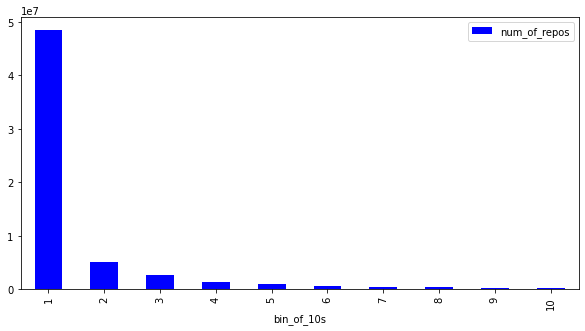

In [23]:
spark.sql('''
SELECT CEIL(commit_count/10) bin_of_10s, sum(num_of_repos) num_of_repos
FROM (
    SELECT *
    FROM commit_counts
    WHERE commit_count < 100
    )
GROUP BY bin_of_10s
ORDER BY bin_of_10s
''').toPandas().plot(kind="bar", x="bin_of_10s", y="num_of_repos", figsize=(10,5), color="blue")

**Comment:** In the original dataset, more than 80% of repositories had commit counts less than 10, and this statistics will be compared to the result after excluding inactive projects 

<AxesSubplot:xlabel='commit_count'>

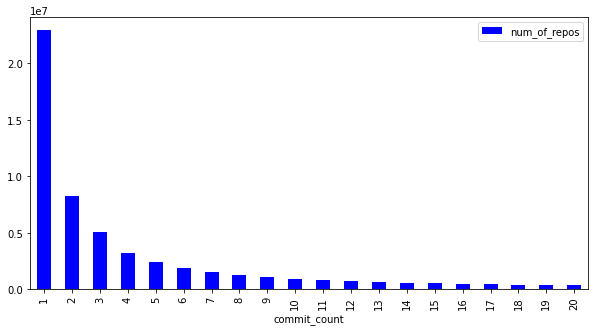

In [24]:
spark.sql('''
SELECT commit_count, num_of_repos
FROM commit_counts
WHERE commit_count <= 20
''').toPandas().plot(kind="bar", x="commit_count", y="num_of_repos", figsize=(10,5), color="blue")

In [25]:
active_project_commitsDF.printSchema()
print("number of active projects: ",active_project_commitsDF.count())

root
 |-- project_id: integer (nullable = true)
 |-- project_id: integer (nullable = true)
 |-- forked_from: integer (nullable = true)
 |-- project_language: string (nullable = true)
 |-- project_created_at: string (nullable = true)
 |-- last_commit_date: string (nullable = true)
 |-- commit_count: integer (nullable = true)

number of active projects:  2166288


Validation: number of active projects stays the same after joining with the project_commit table

In [26]:
active_project_commitsDF.orderBy('commit_count', ascending = False).show(5)

+----------+----------+-----------+----------------+--------------------+--------------------+------------+
|project_id|project_id|forked_from|project_language|  project_created_at|    last_commit_date|commit_count|
+----------+----------+-----------+----------------+--------------------+--------------------+------------+
|  27475310|  27475310|       null|           Shell|2015-05-12 22:32:...|2018-03-25 05:34:...|     3474516|
|  55665958|  55665958|       null|            null|2017-01-25 16:26:...|2017-10-05 22:54:...|      612983|
|  15833059|  15833059|       null|            null|2015-02-02 12:19:...|2018-03-31 23:56:...|      540570|
|  24413203|  24413203|       null|            null|2015-08-20 20:02:...|2018-03-30 14:09:...|      463122|
|  12115031|  12115031|       null|           Shell|2014-09-08 21:11:...|2017-09-04 11:59:...|      420142|
+----------+----------+-----------+----------------+--------------------+--------------------+------------+
only showing top 5 rows



In [27]:
spark.sql('''
SELECT *
FROM active_project_commits
WHERE isnull(forked_from) = False
ORDER BY commit_count desc
''').show(5)

+----------+----------+-----------+----------------+--------------------+--------------------+------------+
|project_id|project_id|forked_from|project_language|  project_created_at|    last_commit_date|commit_count|
+----------+----------+-----------+----------------+--------------------+--------------------+------------+
|   2241543|   2241543|    1217706|            HTML|2013-01-13 15:59:...|2018-03-31 22:30:...|      409685|
|   9723084|   9723084|    9706049|            null|2014-05-16 11:16:...|2018-03-31 02:07:...|      260239|
|  18237398|  18237398|   11321166|               C|2015-04-01 11:26:...|2018-01-05 23:47:...|      137083|
|       789|       789|       3981|            Java|2011-06-19 21:37:...|2018-03-31 23:25:...|      122862|
|  21068858|  21068858|       1088|               C|2015-06-09 15:41:...|2018-02-05 16:43:...|      119707|
+----------+----------+-----------+----------------+--------------------+--------------------+------------+
only showing top 5 rows



**Comment:** commit_count field records the number of commit activities for a project. The commit records in the table `project_commits` corresponds to the commit made to a specific repository (either a base repository or a forked repository). Therefore, the number of commits in the table `active_project_commits` refers to the number of commit activities of a forked repo up to the fork point or the base repository

In [18]:
active_commit_countsDF = spark.sql('''
SELECT commit_count, count(1) AS num_of_repos
FROM active_project_commits
GROUP BY commit_count
ORDER BY commit_count 
''')
active_commit_countsDF.createOrReplaceTempView('active_commit_counts')

<AxesSubplot:xlabel='commit_count'>

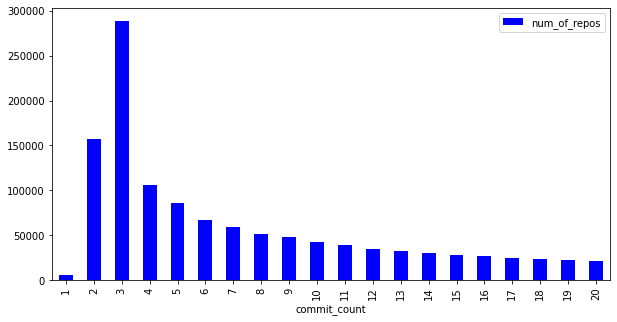

In [29]:
spark.sql('''
SELECT commit_count, num_of_repos
FROM active_commit_counts
WHERE commit_count <= 20
''').toPandas().plot(kind="bar", x="commit_count", y="num_of_repos", figsize=(10,5), color="blue")

**Comment:** it is observed that for the active projects having commit recently with at least one PR, the percentage of projects with one commit decreases significantly compared to the original dataset. It could be because most of single-commit projects either became obsolete (i.e. no longer updated after the first commit) or never had request to participate (i.e. no pull requests). Thus, it is rational that most of active projects have 2 or 3 commit counts because the majority of repositories still have low commits and they need to have relatively more than one commit to receive at least one PR based on the query result.

As a result, the active repositories with only one commit can be excluded because of its minority and the repository needs to have more than one commit to have collaborators for co-commit analysis

In [19]:
active_projectsDF = active_projectsDF.join(active_project_commitsDF.select('project_id','commit_count'),'project_id').filter('commit_count > 1').orderBy('commit_count')

In [65]:
active_projectsDF.show(5)

+----------+--------------------+--------+--------------+--------------------+-----------+----------------+--------------------+--------------------+------------+
|project_id|           repo_name|owner_id|   owner_login|                 url|forked_from|project_language|  project_created_at|    last_commit_date|commit_count|
+----------+--------------------+--------+--------------+--------------------+-----------+----------------+--------------------+--------------------+------------+
|  30047375|      uoke_framework| 8995306|       knowsee|https://api.githu...|       null|      JavaScript|2015-12-18 16:43:...|2017-09-14 07:43:...|           2|
|  44504498|guiaturisticogaro...|30742353|      Rickarof|https://api.githu...|   44502690|            null|2016-08-29 19:29:...|2017-08-17 01:07:...|           2|
|  31712652|           shironeko|   98897|         a2ikm|https://api.githu...|       null|            null|2016-02-02 18:27:...|2017-07-04 12:43:...|           2|
|     82516|          

In [67]:
print('The number of active projects with more than 1 commit is ',active_projectsDF.count())

The number of active projects with more than 1 commit is  2160740


In [68]:
2160740/2166288

0.9974389370203777

**Comment:** It is validated that 0.3% of the one-commit active repositories are excluded. The excluded minority of records will not affect the result of the co-commit analysis but improve the computational efficiency

In [30]:
spark.sql('''
SELECT commit_count, count(1) AS num_of_repos
FROM active_commit_counts
GROUP BY commit_count
ORDER BY commit_count desc
''').show(5)

+------------+------------+
|commit_count|num_of_repos|
+------------+------------+
|     3474516|           1|
|      612983|           1|
|      540570|           1|
|      463122|           1|
|      420142|           1|
+------------+------------+
only showing top 5 rows



In [31]:
spark.sql('''
SELECT 
    ap.project_id, 
    ap.repo_name, 
    ap.forked_from, 
    ap.owner_login,
    ap.project_created_at,
    apc.commit_count
FROM active_projects ap
JOIN active_project_commits AS apc
ON 
    ap.project_id = apc.project_id
ORDER BY commit_count desc
''').show(3,False)

+----------+----------------+-----------+---------------+-----------------------+------------+
|project_id|repo_name       |forked_from|owner_login    |project_created_at     |commit_count|
+----------+----------------+-----------+---------------+-----------------------+------------+
|27475310  |blocklist-ipsets|null       |firehol        |2015-05-12 22:32:45 UTC|3474516     |
|55665958  |OOS             |null       |abodiab        |2017-01-25 16:26:07 UTC|612983      |
|15833059  |my-app          |null       |direwolf-github|2015-02-02 12:19:48 UTC|540570      |
+----------+----------------+-----------+---------------+-----------------------+------------+
only showing top 3 rows



**Comments:** The commit_count of 3.47M is suspicious, and the exact repo with such high commit counts are manually inspected on the GitHub websites and the original query table. 
- The committer, ktsaou, commits 3.47M times to the base repository firehol/blocklist-ipsets, but the actual commit of the repository is only 1. This record is excluded for the scalable analysis

In [21]:
active_projectsDF = active_projectsDF.filter('project_id != 27475310')

In [24]:
# # save active_projectsDF to local parquet for future access
# active_projectsDF.write.parquet(path=os.getcwd()+'/active_projectsDF.parquet')

In [ ]:
# load active_projectsDF
active_projectsDF = spark.read.parquet('active_projectsDF.parquet')

In [ ]:
active_projectsDF.createOrReplaceTempView('active_projects')

In [ ]:
active_projectsDF.show()

#### 5.2.2 Exploratory Analysis on User Commit Data

In [36]:
# Load real_committers.csv
real_committersDF = spark.read.csv(os.getcwd()+"/real_committers.csv",
                                   header=True,
                                   inferSchema=True,
                                   mode="DROPMALFORMED")
real_committersDF.createOrReplaceTempView('real_committers')

In [37]:
real_committersDF.printSchema()

root
 |-- login: string (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- user_type: string (nullable = true)
 |-- project_id: integer (nullable = true)
 |-- latest_commit: string (nullable = true)
 |-- oldest_commit: string (nullable = true)
 |-- commit_count: integer (nullable = true)



In [35]:
# committersDF = spark.sql('''
# SELECT 
#     rc.login committer_login,
#     rc.user_id committer_id,
#     rc.user_type committer_type,
#     rc.project_id project_id,
#     ap.repo_name repo_name,
#     ap.owner_id owner_id,
#     ap.owner_login owner_login,
#     ap.forked_from forked_from,
#     rc.commit_count commit_count
# FROM real_committers rc, active_projects ap
# WHERE ap.project_id = rc.project_id
# ORDER BY commit_count desc
# ''')
# committersDF.limit(10).toPandas()

,committer_login,committer_id,committer_type,project_id,repo_name,owner_id,owner_login,forked_from,commit_count
0,abodiab,33673797,USR,55665958,OOS,33673797,abodiab,None,612979
1,direwolf-github,6869878,USR,15833059,my-app,6869878,direwolf-github,None,540568
2,argo-testing,33323413,USR,54422186,prod-autobuild-prober,33323413,argo-testing,None,276055
3,cmsbuild,1888390,USR,10130463,cms-sw.github.io,1760797,cms-sw,None,216991
4,brianchandotcom,5291,USR,3981,liferay-portal,9502,liferay,None,173328
5,sifex,1547459,USR,73827302,auto-commit,30585232,sudouc,None,158503
6,openstack-gerrit,11651,USR,6052240,openstack,23312,openstack,None,148737
7,tef,84482,USR,10992173,0.0,84482,tef,None,123270
8,julliard,157068,USR,11266639,wine,4826054,wine-mirror,None,113642
9,julliard,157068,USR,12525907,wine,2935683,alexhenrie,None,110268


In [38]:
# load the committersDF from saved parquet file to save time
committersDF = spark.read.parquet('committersDF.parquet')

In [39]:
print('number of all committer-repository records: ',committersDF.count())
print('number of all committer-project records: ',committersDF.filter('isnull(forked_from) == True').count())

number of all committer-repository records:  8112579
number of all committer-project records:  6074235


Filter out committers who commit less than once that could eliminate most of inactive or not primary committers to the active projects

In [40]:
committersDF = committersDF.filter('commit_count > 1')
committersDF.show(5)

+---------------+------------+--------------+----------+-------------+--------+-----------+-----------+------------+
|committer_login|committer_id|committer_type|project_id|    repo_name|owner_id|owner_login|forked_from|commit_count|
+---------------+------------+--------------+----------+-------------+--------+-----------+-----------+------------+
|       web-flow|    30351173|           USR|       471|AugustPenguin|    3969|      tomer|        486|           2|
|       web-flow|    30351173|           USR|  55887230|         Java|11456985|   61baydin|       null|           2|
|      adamvduke|       25571|           USR|       496|        hubot|     142|     github|       null|           2|
|     Kurfursten|     6108343|           USR|  55911363|  vgstation13| 3625544|    DamianX|    3931825|           2|
|  cameronmcefee|       51969|           USR|       496|        hubot|     142|     github|       null|           2|
+---------------+------------+--------------+----------+--------

result after filtering out one-commit committers

In [41]:
print('number of all committer-repository records: ',committersDF.count())
print('number of all committer-project records: ',committersDF.filter('isnull(forked_from) == True').count())

number of all committer-repository records:  5856395
number of all committer-project records:  4488715


**Comment:**
we found that the decreased number of committers who commit to the base project is much smaller in ratio than that of the committers who commit to the forked projects. Thus, committers who work on the base project tends to commit multiple times

In [42]:
committersDF.createOrReplaceTempView('committers')
base_committersDF = committersDF.filter('isnull(forked_from) == True')
base_committersDF.createOrReplaceTempView('base_committers')

In [43]:
# # save committersDF to Parquet for easier retrival and continuous work on the project
# committersDF.write.parquet(path=os.getcwd()+'\committersDF.parquet')

**Comment:** the result above shows the active repositories with the most commit counts, and it is consistent with the commit count results from the exploratory analysis on `active_projects`. Also, to construct the co-commit network, we will focus on commit counts on the project level (including both base repository and all its forks)

In [44]:
active_project_committersDF = spark.sql('''
SELECT
    project_id,
    count(1) num_of_committers
FROM committers
GROUP BY project_id
ORDER BY num_of_committers desc
''')

In [77]:
active_project_committersDF.count()

2088544

**Comment:** Compared to the total number of active projects from table `project_commit`, there were 6,705 less active projects from the table `commit` that had the committer and commit information. It is because one commit could be share by multiple projects. In the table `commit`, the project field corresponds to the one that the commit has been first associated with. This might not be the project this commit was initially pushed to, e.g. in case the fork is processed before the parent, so the table "project_commit" has more accurate correspondance between commits and projects. Also, such 0.3% data loss is considered not significant for the following analyses in this research project

#### 5.2.3 Exploratory Analysis on Star Counts per Repository

In [755]:
# ingest project_stars as spark dataframe
# Load project_stars.csv
project_starsDF = spark.read.csv(os.getcwd()+"/project_stars.csv",
                                   header=True,
                                   inferSchema=True,
                                   mode="DROPMALFORMED")
project_starsDF.createOrReplaceTempView("project_stars")

In [756]:
project_starsDF.printSchema()

root
 |-- project_id: integer (nullable = true)
 |-- star_count: integer (nullable = true)
 |-- latest_star_date: string (nullable = true)
 |-- oldest_star_date: string (nullable = true)



##### Exclude inactive projects to prepare star counts for GH-Impact calculation 

In [757]:
active_project_starsDF = spark.sql('''
SELECT ps.project_id, star_count, latest_star_date, oldest_star_date
FROM project_stars ps, active_projects ap
WHERE ps.project_id = ap.project_id
''') 
active_project_starsDF.createOrReplaceTempView('active_project_stars')

In [758]:
project_timespan_starsDF = spark.sql('''
SELECT 
    project_id,
    star_count,
    ROUND(DATEDIFF(latest_star_date,oldest_star_date)/7) week_diff
FROM
    active_project_stars
ORDER BY star_count desc
''')
project_timespan_starsDF.createOrReplaceTempView('project_timespan_stars')
project_timespan_starsDF.show(10)

+----------+----------+---------+
|project_id|star_count|week_diff|
+----------+----------+---------+
|  14477484|    218166|    170.0|
|  28557277|     97842|    125.0|
|   3905191|     87948|    252.0|
|  27601818|     84975|    128.0|
|  10778840|     83204|    194.0|
|   6445576|     76734|    228.0|
|   4708601|     74394|    348.0|
|      3231|     72362|    448.0|
|   5659677|     71884|    190.0|
|   1155356|     69331|    282.0|
+----------+----------+---------+
only showing top 10 rows



## 6. Scalable Analysis

### 6.1 Demographic Analysis

#### Distribution of active repositories with respect to programming languages

In order to analyze the distribution of lanugages, we analyze both the number of base projects to marginalize out the influence of number of forks 

In [45]:
languageDF = spark.sql('''
SELECT
    project_language,
    count(1) AS num_of_repos,
    sum(commit_count) AS num_of_commits
FROM (
    SELECT ap.project_language, ap.project_id, ap.forked_from, apc.commit_count
    FROM active_projects ap, active_project_commits apc
    WHERE ap.project_id = apc.project_id
        AND isnull(ap.forked_from) = True
)
WHERE project_language != 'null'
GROUP BY project_language
ORDER BY num_of_repos desc 
''')
languageDF.createOrReplaceTempView('language')

In [78]:
languageDF.show(20)

+----------------+------------+--------------+
|project_language|num_of_repos|num_of_commits|
+----------------+------------+--------------+
|      JavaScript|      107195|      20239244|
|          Python|       60017|      16770454|
|            Java|       46853|      15166057|
|            HTML|       42740|       8413557|
|             PHP|       37948|       9910960|
|            Ruby|       27587|      10153734|
|             CSS|       22782|       3937396|
|             C++|       20613|      11320350|
|           Shell|       17778|       4614389|
|              C#|       17323|       3782401|
|               C|       15219|      14043634|
|              Go|       12886|       2794597|
|      TypeScript|        7555|       1269022|
|           Swift|        6425|        780155|
|     Objective-C|        5050|       1049784|
|               R|        4426|        847971|
|           Scala|        3928|       1393733|
|            Perl|        3786|       1389077|
|            

Remove null records and analyze the distribution of top 20 languages

In [46]:
top_languageDF = spark.sql('''
SELECT
    project_language, num_of_repos, num_of_commits
FROM language 
WHERE num_of_repos >= 3102
UNION 
SELECT 
    STRING('other') AS project_language,
    sum(num_of_repos) as num_of_repos,
    sum(num_of_commits) as num_of_commits
FROM (
    SELECT *
    FROM language
    WHERE num_of_repos < 3102
    )
ORDER BY num_of_repos desc
''')
top_languageDF.createOrReplaceTempView('top_language')

In [86]:
top_languageDF.show(30,False)

+----------------+------------+--------------+
|project_language|num_of_repos|num_of_commits|
+----------------+------------+--------------+
|JavaScript      |107195      |20239244      |
|Python          |60017       |16770454      |
|other           |48111       |12451559      |
|Java            |46853       |15166057      |
|HTML            |42740       |8413557       |
|PHP             |37948       |9910960       |
|Ruby            |27587       |10153734      |
|CSS             |22782       |3937396       |
|C++             |20613       |11320350      |
|Shell           |17778       |4614389       |
|C#              |17323       |3782401       |
|C               |15219       |14043634      |
|Go              |12886       |2794597       |
|TypeScript      |7555        |1269022       |
|Swift           |6425        |780155        |
|Objective-C     |5050        |1049784       |
|R               |4426        |847971        |
|Scala           |3928        |1393733       |
|Perl        

In [87]:
language_ratioDF = spark.sql('''
SELECT 
    project_language,
    ROUND(num_of_repos/(sum(num_of_repos) over())*100,3) repo_ratio,
    ROUND(num_of_commits/(sum(num_of_commits) over())*100,3) commit_ratio
FROM top_language
''')

In [88]:
language_ratioDF.show(30,True)

+----------------+----------+------------+
|project_language|repo_ratio|commit_ratio|
+----------------+----------+------------+
|      JavaScript|    20.834|      14.295|
|          Python|    11.664|      11.845|
|           other|      9.35|       8.794|
|            Java|     9.106|      10.712|
|            HTML|     8.307|       5.942|
|             PHP|     7.375|         7.0|
|            Ruby|     5.362|       7.172|
|             CSS|     4.428|       2.781|
|             C++|     4.006|       7.995|
|           Shell|     3.455|       3.259|
|              C#|     3.367|       2.671|
|               C|     2.958|       9.919|
|              Go|     2.504|       1.974|
|      TypeScript|     1.468|       0.896|
|           Swift|     1.249|       0.551|
|     Objective-C|     0.981|       0.741|
|               R|      0.86|       0.599|
|           Scala|     0.763|       0.984|
|            Perl|     0.736|       0.981|
|            Rust|     0.623|       0.569|
|Jupyter No

<AxesSubplot:xlabel='project_language'>

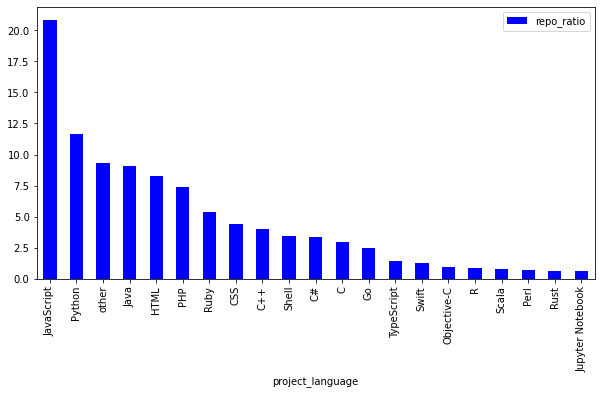

In [89]:
language_ratioDF.toPandas().plot(kind="bar", x="project_language", y="repo_ratio", figsize=(10,5), color="blue")

**Comment:** The 4 most popular languages in terms of number of related base projects are JavaScript (20.8%), Python (11.7%), Java (9.1%), and HTML (8.4%). We can observe that high level languages now are more popularly used in GitHub projects

<AxesSubplot:xlabel='project_language'>

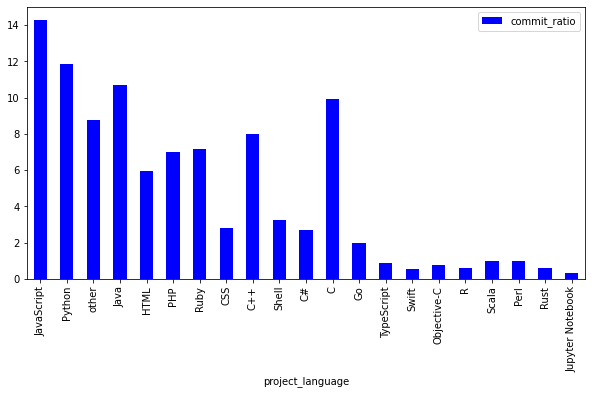

In [90]:
language_ratioDF.toPandas().plot(kind="bar", x="project_language", y="commit_ratio", figsize=(10,5), color="blue")

#### Distribution of developers  with respect to programming languages

The programming language tag of a developer is determined by the language of the majority number of repositories which he or she wrote it with. If a developer owns same number of projects in the top 20 languages, his or her tag will be given by the project that has the most commits.

Here we only consider the top 20 programming languages analyzed in the section above:
- ['JavaScript',
 'Python',
 'Java',
 'HTML',
 'PHP',
 'Ruby',
 'CSS',
 'C++',
 'Shell',
 'C#',
 'C',
 'Go',
 'TypeScript',
 'Swift',
 'Objective-C',
 'R',
 'Scala',
 'Perl',
 'Rust',
 'Jupyter Notebook']

In [91]:
spark.sql('''
SELECT project_language
FROM top_language
''').rdd.map(lambda x: x.project_language).collect()

['JavaScript',
 'Python',
 'other',
 'Java',
 'HTML',
 'PHP',
 'Ruby',
 'CSS',
 'C++',
 'Shell',
 'C#',
 'C',
 'Go',
 'TypeScript',
 'Swift',
 'Objective-C',
 'R',
 'Scala',
 'Perl',
 'Rust',
 'Jupyter Notebook']

In [47]:
user_languageDF = spark.sql('''
SELECT *
FROM (
    SELECT 
        owner_login, 
        project_language, 
        num_of_repos,
        commit_count,
        DENSE_RANK(commit_count) over(partition by owner_login order by commit_count desc) rank
    FROM (
        SELECT
            project_language,
            owner_login,
            count(1) AS num_of_repos,
            sum(commit_count) commit_count
        FROM active_projects
        WHERE project_language IN ('JavaScript', 'Python', 'Java', 'HTML', 'PHP', 'Ruby', 'CSS', 'C++', 'Shell', 'C#', 'C', 'Go', 'TypeScript', 'Swift', 'Objective-C', 'R', 'Scala', 'Perl', 'Rust', 'Jupyter Notebook')
        GROUP BY owner_login, project_language
        )
)
WHERE rank = 1
ORDER BY owner_login desc
''')

In [48]:
user_languageDF.show(10)

+-----------+----------------+------------+------------+----+
|owner_login|project_language|num_of_repos|commit_count|rank|
+-----------+----------------+------------+------------+----+
|    zzzzzzf|            Java|           1|          27|   1|
|zzzzzhuahua|      JavaScript|           1|           3|   1|
|    zzzuzik|          Python|           1|          28|   1|
|   zzzsochi|          Python|           6|         838|   1|
|zzzprojects|              C#|          10|        1421|   1|
|   zzzlight|          Python|           1|           3|   1|
|  zzzhacker|            HTML|           3|           8|   1|
|     zzzeek|          Python|           3|        7002|   1|
|      zzzbl|      JavaScript|           1|          63|   1|
|  zzzanderw|            Java|           1|          24|   1|
+-----------+----------------+------------+------------+----+
only showing top 10 rows



In [49]:
user_languageDF.createOrReplaceTempView('user_language')

In [50]:
user_language_countsDF = spark.sql('''
SELECT 
    project_language,
    count(owner_login) num_of_developers
FROM user_language
GROUP BY project_language
ORDER BY num_of_developers desc
''')
user_language_countsDF.show(30,False)

+----------------+-----------------+
|project_language|num_of_developers|
+----------------+-----------------+
|JavaScript      |83186            |
|Python          |51415            |
|Java            |45488            |
|HTML            |37736            |
|PHP             |29031            |
|C++             |21654            |
|CSS             |20129            |
|Ruby            |19930            |
|C#              |16238            |
|C               |14885            |
|Shell           |12887            |
|Go              |9380             |
|TypeScript      |6526             |
|Swift           |5030             |
|Objective-C     |4247             |
|Jupyter Notebook|3629             |
|R               |3383             |
|Scala           |2647             |
|Perl            |2106             |
|Rust            |1859             |
+----------------+-----------------+



<AxesSubplot:xlabel='project_language'>

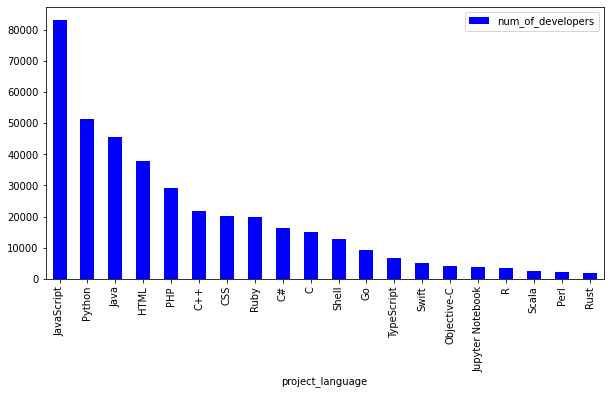

In [51]:
user_language_countsDF.toPandas().plot(kind = 'bar', x = 'project_language', y = 'num_of_developers',figsize=(10,5), color="blue")

In [52]:
user_language_countsDF.createOrReplaceTempView('user_language_counts')

In [53]:
spark.sql('''
SELECT sum(num_of_developers)
FROM user_language_counts
''').show()

+----------------------+
|sum(num_of_developers)|
+----------------------+
|                391386|
+----------------------+



In [54]:
user_language_countsDF.withColumn('ratio',col('num_of_developers')/391386*100).show()

+----------------+-----------------+-------------------+
|project_language|num_of_developers|              ratio|
+----------------+-----------------+-------------------+
|      JavaScript|            83186| 21.254209399416432|
|          Python|            51415| 13.136647708400403|
|            Java|            45488| 11.622285927447585|
|            HTML|            37736|  9.641632557117525|
|             PHP|            29031|  7.417485551348285|
|             C++|            21654|  5.532645521301221|
|             CSS|            20129|  5.143004604150379|
|            Ruby|            19930| 5.0921596582402024|
|              C#|            16238|  4.148845385374029|
|               C|            14885|  3.803150853632986|
|           Shell|            12887|  3.292657376605193|
|              Go|             9380|   2.39661101827863|
|      TypeScript|             6526| 1.6674076231648551|
|           Swift|             5030| 1.2851762709958965|
|     Objective-C|             

**Comment**: The top 5 programming languages are JavaScript (21.25%), Python (13.14%), Java (11.62%), HTML (9.64%), and PHP (7.41%) of the entire population. Also, the JavaScript has the most number of developers that is the twice of the second most popular language Python.

### 6.2 Co-commit Network Analysis

#### 6.2.1 Pagerank from fork information

In [55]:
active_projectsDF.printSchema()

root
 |-- project_id: integer (nullable = true)
 |-- repo_name: string (nullable = true)
 |-- owner_id: integer (nullable = true)
 |-- owner_login: string (nullable = true)
 |-- url: string (nullable = true)
 |-- forked_from: integer (nullable = true)
 |-- project_language: string (nullable = true)
 |-- project_created_at: string (nullable = true)
 |-- last_commit_date: string (nullable = true)
 |-- commit_count: integer (nullable = true)



In [56]:
active_projectsDF = active_projectsDF.filter("project_language IN ('JavaScript', 'Python', 'Java', 'HTML', 'PHP', 'Ruby', 'CSS', 'C++', 'Shell', 'C#', 'C', 'Go', 'TypeScript', 'Swift', 'Objective-C', 'R', 'Scala', 'Perl', 'Rust', 'Jupyter Notebook')")

In [103]:
active_projectsDF.select('project_id').distinct().count()

686177

In [104]:
vertices_fork =  active_projectsDF.withColumnRenamed('project_id', 'id').distinct()

In [105]:
edges_fork =  active_projectsDF.filter('isnull(forked_from) == False').withColumnRenamed("forked_from", "src").withColumnRenamed("project_id", "dst")

In [106]:
edges_fork.show()

+--------+--------------------+--------+----------------+--------------------+--------+----------------+--------------------+--------------------+------------+
|     dst|           repo_name|owner_id|     owner_login|                 url|     src|project_language|  project_created_at|    last_commit_date|commit_count|
+--------+--------------------+--------+----------------+--------------------+--------+----------------+--------------------+--------------------+------------+
|68991171|    packer-xenserver|  569847|      edwintorok|https://api.githu...|16370003|           Shell|2017-07-07 10:26:...|2017-07-07 10:52:...|           2|
|82368918|      pytest-plugins| 2219004|           j0057|https://api.githu...|24190682|          Python|2017-12-06 08:16:...|2017-12-06 08:28:...|           2|
|69003081|          tcollector|  201171|       hegenberg|https://api.githu...| 1001579|          Python|2017-07-07 13:47:...|2017-07-07 13:51:...|           2|
|67459589|           The-Vault|33462110|

In [107]:
forkGraph = GraphFrame(vertices_fork, edges_fork)

In [108]:
print("Total Number of projects: ", forkGraph.vertices.count())
print("Total Number of fork relationship in Graph: ", forkGraph.edges.count())
print("Total Number of projects in Original Data: ", active_projectsDF.select('project_id').distinct().count())

Total Number of projects:  686177
Total Number of fork relationship in Graph:  219759
Total Number of projects in Original Data:  686177


**Degree statistics and distribution**
Analyzing the incoming degree and outgoing degree of all nodes:

In [109]:
outDeg = forkGraph.outDegrees.orderBy(desc("outDegree"))
outDeg.show()

+--------+---------+
|      id|outDegree|
+--------+---------+
| 9808223|      794|
| 9988540|      653|
| 9409249|      548|
|22097841|      395|
|64482546|      289|
|33055832|      260|
|     992|      226|
|76506249|      199|
| 7412393|      195|
| 7846626|      174|
|    3981|      172|
|20594602|      165|
|69964388|      163|
|66184682|      156|
|76767171|      143|
|41857480|      140|
| 3828093|      138|
|76253397|      133|
|13642463|      121|
|16978185|      114|
+--------+---------+
only showing top 20 rows



In [110]:
inDeg = forkGraph.inDegrees.orderBy(desc("inDegree"))
inDeg.show()

+--------+--------+
|      id|inDegree|
+--------+--------+
| 1292491|       1|
| 7432164|       1|
| 7994355|       1|
|42755435|       1|
|55592537|       1|
|56375112|       1|
|61897804|       1|
|62099486|       1|
|62862379|       1|
|62988059|       1|
|64401641|       1|
|65405777|       1|
|65996175|       1|
|66506520|       1|
|66561690|       1|
|66566812|       1|
|74728057|       1|
|75124851|       1|
|75748539|       1|
|76328678|       1|
+--------+--------+
only showing top 20 rows



In [111]:
%%time
pr_fork = forkGraph.pageRank(resetProbability=0.15, tol=0.01)

Wall time: 41min 24s


In [112]:
pr_forkDF = pr_fork.vertices.orderBy(desc("pagerank")).select(["id", "pagerank"])

In [113]:
pr_fork.vertices.orderBy(desc("pagerank")).select(["id", "pagerank"]).show()

+--------+------------------+
|      id|          pagerank|
+--------+------------------+
|67090338|3.2234344881580714|
|65401905|3.2234344881580714|
|66442294|3.2234344881580714|
|80143029|2.7697218281884224|
|88508135|2.7697218281884224|
|82940483|2.7697218281884224|
|70014118|2.7697218281884224|
|62729330|2.7697218281884224|
|91898647|2.7697218281884224|
|86130617|2.7697218281884224|
|81366577|2.7697218281884224|
|90236178|2.7697218281884224|
|76299314|2.7697218281884224|
|88939708|2.7697218281884224|
|76736436|2.7697218281884224|
|43332493|2.7697218281884224|
|66225510|2.7697218281884224|
|80966903|2.7697218281884224|
|83215282|2.7697218281884224|
|73020618|2.7697218281884224|
+--------+------------------+
only showing top 20 rows



In [114]:
# # save pr_fork to Parquet for easier retrival and continuous work on the project
# pr_fork.vertices.orderBy(desc("pagerank")).select(["id", "pagerank"]).write.parquet(path=os.getcwd()+'\pr_fork.parquet')

In [57]:
# load the pr_fork from saved parquet file to save time
pr_forkDF = spark.read.parquet('pr_fork.parquet')
pr_forkDF.show(5)

+--------+------------------+
|      id|          pagerank|
+--------+------------------+
|37846764|0.8701014068604669|
|55855345|0.8701014068604669|
|61372035|0.8701014068604669|
|68288803|0.8701014068604669|
|38885126|0.8701014068604669|
+--------+------------------+
only showing top 5 rows



#### Select active users
To conduct the co-authorship network analysis, the users qualified as co-authors to projects/repositories need to be selected. Cohen and Consens considered only committers who contributed more than 75% of the average commits per repository as collaborators/co-authors for a certain repository [4]. In Cohen and Consens work, the filtering criterion stated above can be summarized as 
$$c(d, r) > \theta*c_{avg} (r)$$, 
where 
- $c(d, r)$: the number of commits by a developer d to a specific repository r, 
- $\theta$: parameterized activity threshold
- $c_{avg} (r)$ is the average number of commits per repository.

For $\theta = 0.3$, it is validated the active developers consists approximately 80% of all commits for each programming language.

In [59]:
active_userDF = committersDF.select('committer_login','committer_id','project_id','repo_name','commit_count') \
                            .withColumnRenamed('committer_login','owner_login') \
                            .join(user_languageDF.select('owner_login','project_language'),'owner_login') \
                            .withColumnRenamed('owner_login','committer_login')

In [72]:
# # save active_user for future access
# active_userDF.write.parquet(path = os.getcwd() + '/active_userDF.parquet')

In [73]:
active_userDF = spark.read.parquet('active_userDF.parquet')

In [62]:
committersDF.count()

5856395

In [74]:
active_userDF.count()

1655681

**Comment:** active users using the programming languages of interests to this project consist of 33% of total developers.

##### Select users based on $c(d, r) > \theta*c_{avg} (r)$

In [64]:
active_projectsDF.count()

686177

In [65]:
active_projectsDF.agg(sum('commit_count')).collect()

[Row(sum(commit_count)=188749370)]

In [67]:
c_avg = 188749370/686177

In [124]:
0.3*c_avg

82.52216410634574

In [125]:
primary_committers = active_userDF.filter('commit_count > 82') 

In [126]:
primary_committers.show()

+---------------+------------+----------+--------------------+------------+----------------+
|committer_login|committer_id|project_id|           repo_name|commit_count|project_language|
+---------------+------------+----------+--------------------+------------+----------------+
|          0xsky|     2765829|  10652012|              xredis|         115|             C++|
|     1aurabrown|     1370052|  43642728|               force|         116|             CSS|
|      215566435|    13288454|  75646616|                 Luy|         135|      JavaScript|
|      215566435|    13288454|  88842212|             Dragact|         100|      JavaScript|
|        54sword|      728771|  58851476|    api.xiaoduyu.com|          87|      JavaScript|
|          AAlvz|     1808095|  11690304|adblockplus-infra...|          99|           Shell|
|     AlanCoding|     8033290|  10310401|           tower-cli|         263|          Python|
|     AlanCoding|     8033290|  74026845|                 awx|        

In [127]:
primary_committers.createOrReplaceTempView('primary_committers')

In [128]:
# the filtered primary users for each project language based on the algorithm 
primary_user_language_countsDF = spark.sql('''
SELECT 
    project_language,
    count(committer_login) primary_developer_count,
    sum(commit_count) primary_commit_count
FROM primary_committers
GROUP BY project_language
ORDER BY primary_developer_count desc
''')
primary_user_language_countsDF.show(30,False)

+----------------+-----------------------+--------------------+
|project_language|primary_developer_count|primary_commit_count|
+----------------+-----------------------+--------------------+
|JavaScript      |41984                  |12647145            |
|Python          |32427                  |12583489            |
|Java            |21403                  |11345205            |
|C++             |17311                  |8502997             |
|PHP             |14276                  |5405309             |
|Ruby            |13620                  |4664918             |
|C               |13351                  |7931708             |
|HTML            |12965                  |3890972             |
|CSS             |8570                   |2717211             |
|Go              |8350                   |2885028             |
|Shell           |8021                   |2925278             |
|C#              |7655                   |2700586             |
|Scala           |3199                  

In [129]:
# the total number of developers and commits for each language
active_user_language_stats = active_userDF.groupBy('project_language').agg(count('committer_login').alias('num_of_developers'),sum('commit_count').alias('num_of_commits')).orderBy(desc('num_of_commits'))
active_user_language_stats.show()

+----------------+-----------------+--------------+
|project_language|num_of_developers|num_of_commits|
+----------------+-----------------+--------------+
|      JavaScript|           357256|      17593425|
|          Python|           239319|      15727094|
|            Java|           153531|      13459187|
|             C++|            97941|       9817521|
|               C|            76556|       8907488|
|             PHP|           112678|       6892676|
|            Ruby|           109814|       6111009|
|            HTML|           113596|       5437364|
|              Go|            75141|       3815823|
|           Shell|            68745|       3782672|
|             CSS|            65137|       3638980|
|              C#|            55219|       3465026|
|            Perl|            15438|       1763637|
|           Scala|            18371|       1503661|
|            Rust|            24328|       1314024|
|      TypeScript|            24839|       1251675|
|           

In [139]:
primary_user_language_countsDF.join(active_user_language_stats, 'project_language') \
                              .withColumn('Fraction of Active Developers', round(col('primary_developer_count')/col('num_of_developers'),3)) \
                              .withColumn('Percentage of Commits', round(col('primary_commit_count')/col('num_of_commits')*100,2)) \
                              .select('project_language','Fraction of Active Developers','Percentage of Commits') \
                              .orderBy('project_language').show(30,False)
        

+----------------+-----------------------------+---------------------+
|project_language|Fraction of Active Developers|Percentage of Commits|
+----------------+-----------------------------+---------------------+
|C               |0.174                        |89.05                |
|C#              |0.139                        |77.94                |
|C++             |0.177                        |86.61                |
|CSS             |0.132                        |74.67                |
|Go              |0.111                        |75.61                |
|HTML            |0.114                        |71.56                |
|Java            |0.139                        |84.29                |
|JavaScript      |0.118                        |71.89                |
|Jupyter Notebook|0.123                        |74.86                |
|Objective-C     |0.122                        |72.21                |
|PHP             |0.127                        |78.42                |
|Perl 

**Comment:** For $\theta = 0.3$, it is found that the primary committers contributes to around 80% onaverage for each project language, and around 85% of developers are inactive that can be excluded to make the co-commit network analysis far more computational efficient without affecting the results

In [141]:
vertices_user = primary_committers.withColumnRenamed("committer_id",'id').distinct()

In [142]:
vertices_user.printSchema()

root
 |-- committer_login: string (nullable = true)
 |-- id: integer (nullable = true)
 |-- project_id: integer (nullable = true)
 |-- repo_name: string (nullable = true)
 |-- commit_count: integer (nullable = true)
 |-- project_language: string (nullable = true)



In [143]:
user_repoDF = primary_committers.select("committer_id","project_id")

In [144]:
edges_user = user_repoDF.withColumnRenamed("committer_id", "id1"). \
                      join(user_repoDF.withColumnRenamed("committer_id", "id2"), "project_id"). \
                      where("id1 < id2"). \
                      select("id1", "id2",'project_id'). \
                      distinct()

In [866]:
edges_user.count()

247496

In [146]:
edges_user.show(5)

+-------+-------+----------+
|    id1|    id2|project_id|
+-------+-------+----------+
|4469689|7949166|  30811447|
|  64724|  77776|  17208611|
|   5566|3220058|       864|
|   5566|  82337|  19984183|
| 931540|1795726|   3240743|
+-------+-------+----------+
only showing top 5 rows



In [147]:
edges_user = edges_user.withColumnRenamed("id1", "src"). \
                        withColumnRenamed("id2", "dst")

In [148]:
edges_user.printSchema()

root
 |-- src: integer (nullable = true)
 |-- dst: integer (nullable = true)
 |-- project_id: integer (nullable = true)



In [245]:
cocommitGraphDF = GraphFrame(vertices_user, edges_user)

In [150]:
outDeg = cocommitGraphDF.outDegrees.orderBy(desc("outDegree"))
outDeg.show()

+-------+---------+
|     id|outDegree|
+-------+---------+
|  13194|     1208|
|   5203|     1011|
|   5212|      948|
|    129|      924|
|   5291|      801|
|   6417|      761|
|   6682|      734|
|  28831|      700|
|  15756|      638|
|  40493|      598|
|  30140|      550|
|   6023|      545|
|  45873|      523|
|  17141|      518|
| 231317|      516|
|1665613|      515|
| 100937|      514|
| 115196|      499|
|  11796|      489|
|   2779|      483|
+-------+---------+
only showing top 20 rows



In [151]:
%%time
inDeg = cocommitGraphDF.inDegrees.orderBy(desc("inDegree"))
inDeg.show()

+-------+--------+
|     id|inDegree|
+-------+--------+
|4659404|     887|
| 629598|     853|
| 333582|     739|
|3119227|     703|
|1868770|     604|
|2323119|     583|
| 130519|     580|
|2062189|     530|
|3204869|     528|
|1665613|     497|
|6751821|     465|
|  71242|     462|
|4605094|     451|
|7780816|     448|
| 339696|     436|
| 603514|     431|
| 923877|     425|
|3035095|     423|
|3307580|     422|
|3480946|     419|
+-------+--------+
only showing top 20 rows

Wall time: 20.9 s


In [246]:
%%time
pr_cocommit = cocommitGraphDF.pageRank(resetProbability=0.15, tol=0.01)

Wall time: 15min 59s


In [247]:
# # save pr_fork to Parquet for easier retrival and continuous work on the project
# pr_cocommit.vertices.orderBy(desc("pagerank")).select(["id", "pagerank"]).write.parquet(path=os.getcwd()+'\pr_cocommit.parquet')

In [447]:
# load the pr_fork from saved parquet file to save time
pr_cocommit = spark.read.parquet('pr_cocommit.parquet')
pr_cocommit = pr_cocommit.distinct()
pr_cocommit.show(6)

+--------+------------------+
|      id|          pagerank|
+--------+------------------+
|31120552|0.7789892663441332|
|  634991|0.7789892663441332|
| 6834732|0.7789892663441332|
|  336940|0.7789892663441332|
|  662646|0.7789892663441332|
| 3542734|0.7789892663441332|
+--------+------------------+
only showing top 6 rows



#### 6.2.2 Calculate Gh-impact that resembles h-index

Ian Dennis Miller [7] , a PhD student in UofT, announced _gh-impact_ as a measure of influence among open source developers, which resembles the h-index for scholers. Gh-impact is defined as that an account has a gh-impact score of **n** if they have **n** projects with at least **n** stars.

_source: http://www.gh-impact.com_

**Definition:** A developer has index h if h of his/her Np repositories have at least h stars each, and the other (Np − h) repositories have no more than h stars each.


In [758]:
project_timespan_starsDF = spark.sql('''
SELECT 
    project_id,
    star_count,
    ROUND(DATEDIFF(latest_star_date,oldest_star_date)/7) week_diff
FROM
    active_project_stars
ORDER BY star_count desc
''')
project_timespan_starsDF.createOrReplaceTempView('project_timespan_stars')
project_timespan_starsDF.show(10)

+----------+----------+---------+
|project_id|star_count|week_diff|
+----------+----------+---------+
|  14477484|    218166|    170.0|
|  28557277|     97842|    125.0|
|   3905191|     87948|    252.0|
|  27601818|     84975|    128.0|
|  10778840|     83204|    194.0|
|   6445576|     76734|    228.0|
|   4708601|     74394|    348.0|
|      3231|     72362|    448.0|
|   5659677|     71884|    190.0|
|   1155356|     69331|    282.0|
+----------+----------+---------+
only showing top 10 rows



In [759]:
primary_committers.show(5)

+---------------+------------+----------+----------------+------------+----------------+
|committer_login|committer_id|project_id|       repo_name|commit_count|project_language|
+---------------+------------+----------+----------------+------------+----------------+
|          0xsky|     2765829|  10652012|          xredis|         115|             C++|
|     1aurabrown|     1370052|  43642728|           force|         116|             CSS|
|      215566435|    13288454|  75646616|             Luy|         135|      JavaScript|
|      215566435|    13288454|  88842212|         Dragact|         100|      JavaScript|
|        54sword|      728771|  58851476|api.xiaoduyu.com|          87|      JavaScript|
+---------------+------------+----------+----------------+------------+----------------+
only showing top 5 rows



In [760]:
committer_star = primary_committers.join(project_timespan_starsDF,'project_id').orderBy('committer_login')

In [761]:
committer_star.show()

+----------+---------------+------------+--------------------+------------+----------------+----------+---------+
|project_id|committer_login|committer_id|           repo_name|commit_count|project_language|star_count|week_diff|
+----------+---------------+------------+--------------------+------------+----------------+----------+---------+
|  12870957|        00-Evan|     4761381|shattered-pixel-d...|         123|            Java|        60|    174.0|
|  11172397|        00-Evan|     4761381|shattered-pixel-d...|        1255|            Java|       290|    189.0|
|  10401646|        0003088|     4613472|          libelektra|          83|             C++|        97|    193.0|
|  11651173|        0003088|     4613472|          libelektra|         142|             C++|         1|      0.0|
|  22073200|            00K|     1596814|                tera|         334|             C++|      1450|    141.0|
|  25844356|            00K|     1596814|                 mdt|          84|             

In [765]:
ghimpactDF_pre = committer_star.select('committer_login','committer_id','project_id','repo_name','project_language','star_count') \
                               .groupBy('committer_login').agg(count('project_id').alias('n_repo'),sum('star_count').alias('n_star'))

In [767]:
# # save committer_star into local parquet for faster future access
# committer_star.write.parquet(path = os.getcwd()+'\committer_star.parquet')

In [768]:
committer_star = spark.read.parquet('committer_star.parquet')

Prepare the dataframe to apply the "h-index" algorithm by first convert the sorted number of repository stars into a list for each developer

In [826]:
ghimpactDF_pre = committer_star.select('committer_login','committer_id','project_id','repo_name','project_language','star_count') \
                               .groupBy('committer_login').agg(collect_list('star_count')).rdd.map(lambda x: (x[0],sorted(x[1])))

ghimpactDF_pre = ghimpactDF_pre.toDF(['committer_login','star_list'])

In [827]:
ghimpactDF_pre.show()

+----------------+--------------------+
| committer_login|           star_list|
+----------------+--------------------+
|     AdirShemesh|                 [1]|
|        AgtLucas|           [1, 1, 9]|
|        AkashiSN|              [6, 7]|
|       Albert221|                 [8]|
|       AmatCoder|                [76]|
|            Ane2|                [26]|
|         Arrilot|           [33, 440]|
|         Arvenil|       [16, 34, 140]|
|          Austio|                [10]|
|          Briles|         [106, 2728]|
|CamDavidsonPilon|   [438, 660, 14973]|
|   Cornelius2017|                 [1]|
|         Crisu83|       [12, 32, 275]|
|          Crowes|                 [1]|
|        CyberZHG|            [10, 18]|
|       CyrusSUEN|         [260, 2011]|
|      DataTables|[1, 3, 4, 8, 8, 1...|
|           Daudr|                 [1]|
|          Dieken|                [15]|
|         Ellpeck|            [3, 113]|
+----------------+--------------------+
only showing top 20 rows



In [840]:
# define a UDF to calculate the GH-impact by applying iterating algorithm to the number of star list for each committer
def calc_ghi(stars):
    low = 0
    length = len(stars)
    high = length
    while (low < high):
        mid = int(low + (high-low)/2)
        if (stars[mid]==length-mid):
            return stars[mid]
        elif (stars[mid]>(length-mid)):
            high = mid
        else:
            low = mid+1     

    return length-high

# Register as Spark UDF
calc_ghiUDF = udf(lambda x: calc_ghi(x), IntegerType())

In [845]:
ghimpactDF = ghimpactDF_pre.withColumn('ghimpact',calc_ghiUDF('star_list'))

In [846]:
ghimpactDF.orderBy(desc('ghimpact')).show()

+---------------+--------------------+--------+
|committer_login|           star_list|ghimpact|
+---------------+--------------------+--------+
|         fabpot|[1, 1, 1, 1, 1, 1...|      54|
|   sindresorhus|[1, 1, 1, 68, 70,...|      50|
|     dougwilson|[10, 23, 24, 55, ...|      43|
| michaelklishin|[3, 4, 5, 5, 8, 1...|      42|
|   kevinsawicki|[4, 19, 23, 40, 6...|      40|
|       pranavkm|[12, 21, 29, 30, ...|      39|
|         gregkh|[1, 1, 1, 1, 1, 1...|      38|
|   renovate-bot|[1, 1, 1, 1, 1, 1...|      37|
| nicolas-grekas|[1, 1, 1, 1, 1, 2...|      36|
| GrahamCampbell|[1, 12, 22, 38, 4...|      34|
|         hadley|[1, 1, 1, 19, 24,...|      34|
|         jsoref|[32, 40, 44, 53, ...|      33|
|  weierophinney|[1, 1, 2, 4, 5, 6...|      32|
|             dg|[20, 55, 56, 60, ...|      31|
|     freekmurze|[14, 78, 97, 137,...|      30|
|          tas50|[1, 2, 2, 3, 3, 4...|      29|
|          dsyer|[1, 4, 5, 7, 22, ...|      28|
|        agentzh|[54, 62, 67, 90, ...|  

#### 6.2.3 Prepare graphs in NetworkX for network analysis

In [81]:
# !pip install networkx

In [152]:
import networkx as nx

In [153]:
pr_forkDF = pr_forkDF.withColumnRenamed('id','project_id')

In [154]:
edges_user.printSchema()

root
 |-- src: integer (nullable = true)
 |-- dst: integer (nullable = true)
 |-- project_id: integer (nullable = true)



In [271]:
edges_cocommit = edges_user.join(pr_forkDF,'project_id') \
                           .select('src','dst','pagerank') \
                           .withColumnRenamed('pagerank','weight')

In [272]:
edges_cocommit.printSchema()

root
 |-- src: integer (nullable = true)
 |-- dst: integer (nullable = true)
 |-- weight: double (nullable = true)



In [273]:
os.getcwd()

'C:\\Users\\wuyuz\\Documents\\MIE1512\\Final Project'

In [1000]:
# # save result to local database for faster future access
# edges_cocommit.write.csv('edges_cocommit.csv')

In [275]:
edges_cocommit.show(5)

+-------+-------+------------------+
|    src|    dst|            weight|
+-------+-------+------------------+
|4469689|7949166|0.9080548970436084|
|  64724|  77776|0.8805370156451158|
|   5566|3220058|0.8691709341979124|
|   5566|  82337| 0.876207079855705|
| 931540|1795726|1.0538697577149687|
+-------+-------+------------------+
only showing top 5 rows



Building a weighted edge list in the format [(node1, node2, repo_fork_pagerank)]:

In [277]:
edgeCocommitList = list(edges_cocommit.toPandas().to_records(index=False))

Creating a graph and adding the edges (vertices will be created automatically):

In [753]:
cocommitGraph = nx.Graph()
cocommitGraph.add_weighted_edges_from(edgeCocommitList)

In [961]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    degrees_pdf = pd.Series(degrees).value_counts().sort_index()
    degSum = np.sum(degrees_pdf)
    deg_cdf = np.cumsum(degrees_pdf)/degSum*100
    plt.plot(deg_cdf)
    plt.xlabel('Degree')
    plt.ylabel('Percentage (%)')
    plt.title('(a) Cumulative Distribution of Degree')
    plt.show()
    
def plot_clustering_dist(G):
    clustering_coef = nx.clustering(G)
    cc_pdf = pd.Series(clustering_coef).value_counts().sort_index()
    ccSum = np.sum(cc_pdf)
    cc_cdf = np.cumsum(cc_pdf)/ccSum*100
    plt.plot(cc_cdf)
    plt.xlabel('Clustering Coefficient')
    plt.ylabel('Percentage (%)')
    plt.ylim([0,100])
    plt.xlim([0,1])
    plt.title('(b) Cumulative Distribution of Clustering Coefficient')
    plt.show()
    
def plot_pagerank_dist(G):
    pagerank = G.rdd.map(lambda x: x.pagerank).collect()
    pr_pdf = pd.Series(pagerank).value_counts().sort_index()
    prSum = np.sum(pr_pdf)
    pr_cdf = np.cumsum(pr_pdf)/prSum*100
    plt.plot(pr_cdf)
    plt.xlabel('Pagerank')
    plt.ylabel('Percentage (%)')
    plt.ylim([0,100])
    plt.title('(c) Cumulative Distribution of Pagerank')
    plt.show()
 
def top10components(G):
    pos = [str(x)+'th' for x in range(1,11)]
    plt.bar(pos,[len(n) for n in sorted(nx.connected_components(G), key = len, reverse=True)[:10]])
    plt.xlabel('Top 10 Connected Components')
    plt.ylabel('component size')
    plt.title('(d) Connected Compoenent Size')
    
def plot_pathLength_dist(G):
    LCC = sorted(nx.connected_components(G), key = len, reverse=True)[0]
    H = G.subgraph(LCC)
    pl = sorted(nx.shortest_path_length(H))
    plList = []
    for i in range(len(pl)):
        plList += pl[i][1].values()
    pl_pdf = pd.Series(plList).value_counts().sort_index()
    pl_pdf /= np.sum(pl_pdf)/100
    plt.plot(pl_pdf, 'o-')
    plt.xlabel('Path Length')
    plt.ylabel('Percentage (%)')
    plt.title('(e) Distribution of Path Length')

def plot_robustness_dist(G):
    degPair = [(n,G.degree(n)) for n in G.nodes()]
    degPair.sort(key=lambda k: k[1], reverse=True)
    posList = [0.01, 0.1, 1, 5, 7, 9, 10, 15, 20]
    fracList = np.array(posList)/100
    LCC_list = []
    restNodes = []
    for frac in fracList:
        G1 = G.copy()
        nodes_rm = [n[0] for n in degPair[:int(len(degPair)*frac)]]
        G1.remove_nodes_from(nodes_rm)
        nComponents = [len(n) for n in sorted(nx.connected_components(G1), key = len, reverse=True)]
        LCC_frac = nComponents[0]/np.sum(nComponents)
        LCC_list.append(LCC_frac)
        restNodes.append(1-LCC_frac)
    pos = range(len(fracList))
    plt.bar(pos, restNodes)
    plt.bar(pos, LCC_list, bottom = restNodes)
    plt.xticks(pos, [str(x)+'%' for x in posList],rotation=60)
    plt.xlabel('Fraction of Network Removed')
    plt.ylabel('Percentage (%)')
    plt.title('(f) Robustness')

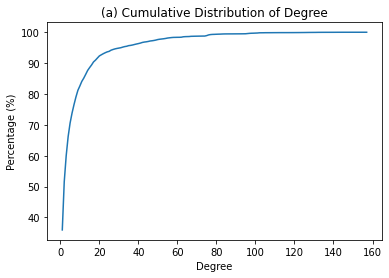

Average degree is  7.258385903850337


In [938]:
#### Degree
plot_degree_dist(cocommitGraph)
print('Average degree is ', np.mean([cocommitGraph.degree(n) for n in cocommitGraph.nodes()]))

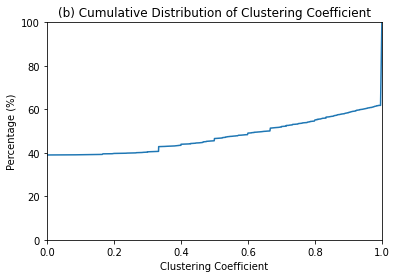

Average clustering coefficient is  0.5265716264397087


In [942]:
#### Clustering Coefficient
plot_clustering_dist(cocommitGraph)
print('Average clustering coefficient is ', np.mean(pd.Series(nx.clustering(cocommitGraph))))

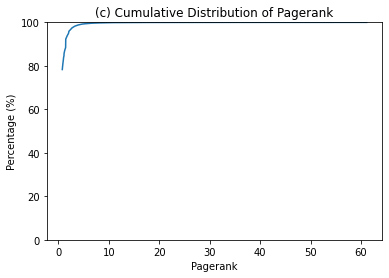

In [747]:
#### Pagerank
plot_pagerank_dist(pr_cocommit)

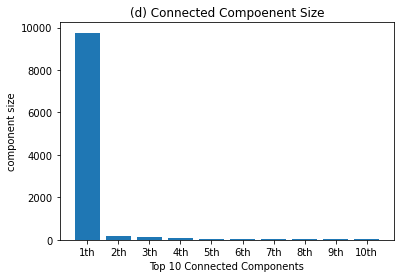

In [748]:
#### Connected Components
top10components(cocommitGraph)

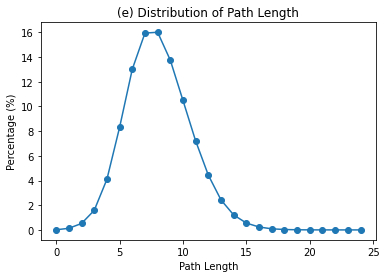

In [749]:
#### Path Length
plot_pathLength_dist(cocommitGraph)

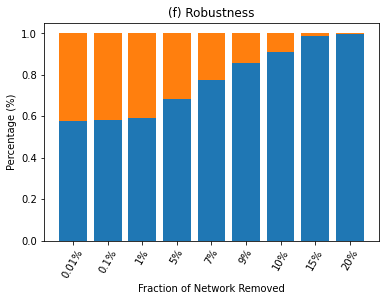

In [962]:
#### Robustness
plot_robustness_dist(cocommitGraph)

**Co-commit Network Analysis Result:**

Fig (a) shows the cumulative distribution function (CDF) of the degree in the co-commit network, the average degree is 7.25 that is similar to the average degree of the co-authorship network of 6.14 from the original paper. Compared to online social networks (OSNs) of 20 to 30, the network is loosely connected because two developers are considered co-committers and connected in the network only if they have committed to at least one same repository while the users in OSNs can be connected whenever one chooses to follow another. Thus, it is harder to build connections in the co-commit network

Fig (b) shows the CDF of the clustering coefficient. The average clustering coefficient is 0.527 that is much larger than that in OSNs (0.14 in Ren-ren, 0.16 in Cyworld [1]), and it is even larger than that of the co-authorship network of the original paper. It indicates that the developers are tightly connected if they contribute to the same repositories. People from the same project groups or companies are more likely to commit together to the same repositories. Similar result can be found in Fig (c).

Fig (d) shows the sizes of the 10 largest connected components. There is a huge largest connected component of size 9790 that covers more than 90% of all developers. The 2nd, 3rd, and 4th components have around 100 developers, and the rest have less than 50 developers.

Fig (e) shows the distribution of the shortest path of the largest connected component. The average path is 7.86 (as small as the average path from the co-authorship network of 5.96). The small average path with a high clustering coefficient exhibits the properies of small world networks [8]

Fig (f) shows the robustness of the co-commit network by removing a fraction of high degree nodes from the network and analyzing the percentage of the largest connected component. At the beginning, the largest connected component consists of more than 40% of the network. By removing up to 9% of the high degree nodes, the largest connected component covers around 20% of the remaining nodes that the network is still well connected. However, the co-commit network is not as robust as the co-authorship network because the co-authorship network has a largest connected component covering about 30% of the remaining nodes after removing 20% of the high degree nodes.

### 6.3 Comparison Among Different Progamming Languages

In [888]:
committerByLanguage = primary_committers.select('project_language','committer_login','committer_id').distinct() \
                                        .groupBy('project_language').agg(collect_list('committer_id').alias('committer_list'))
committerByLanguage.show()

+----------------+--------------------+
|project_language|      committer_list|
+----------------+--------------------+
|              C#|[2063243, 1087208...|
|            Rust|[1055437, 2476835...|
|      JavaScript|[36376715, 142609...|
|            Perl|[19983, 6988652, ...|
|             C++|[353904, 11196514...|
|Jupyter Notebook|[116548, 1276966,...|
|               C|[139780, 163014, ...|
|     Objective-C|[247548, 4856894,...|
|           Swift|[10038333, 336128...|
|      TypeScript|[4435562, 3198076...|
|             CSS|[11251791, 500007...|
|            HTML|[13100074, 169396...|
|               R|[460606, 2809735,...|
|           Scala|[2573913, 1887276...|
|             PHP|[43283, 5709575, ...|
|              Go|[83911, 6654416, ...|
|            Ruby|[51442, 11741825,...|
|          Python|[219309, 750523, ...|
|            Java|[3437083, 7829765...|
|           Shell|[866140, 2008922,...|
+----------------+--------------------+



In [1003]:
df1 = committerByLanguage.rdd.map(lambda x: (x[0],([n for n in x[1] if n in list(cocommitGraph.nodes())])))

In [1022]:
df2 = df1.toDF(['project_language','committer_list'])

In [1031]:
# # save language_committer_list to local as parquet file for faster access
# df2.write.parquet(path = os.getcwd()+'\language_committer_list.parquet')

df2 = spark.read.parquet('language_committer_list.parquet')

In [1056]:
lenUDF = udf(lambda x: len(x))
df2.withColumn('length_list',lenUDF(col('committer_list'))).show()

+----------------+--------------------+-----------+
|project_language|      committer_list|length_list|
+----------------+--------------------+-----------+
|      JavaScript|[142609, 20185, 6...|       4060|
|          Python|[750523, 203326, ...|       3756|
|            Java|[4878950, 803453,...|       2438|
|             C++|[353904, 4661122,...|       2275|
|               C|[163014, 960279, ...|       1581|
|     Objective-C|[13939, 659477, 1...|        121|
|             PHP|[5709575, 424344,...|       1463|
|            Ruby|[428677, 33995401...|       1369|
|            HTML|[238422, 330935, ...|       1066|
|              Go|[83911, 6654416, ...|        959|
|           Shell|[7292447, 15157, ...|        804|
|              C#|[2063243, 556041,...|        793|
|             CSS|[9159079, 10102, ...|        694|
|           Scala|[2573913, 3589526...|        331|
|            Rust|[109548, 1559013,...|        296|
|      TypeScript|[1247645, 507983,...|        278|
|           

In [ ]:
# find the gh-impact for each primary committer
committer_ghiDF = primary_committers.select('project_language','committer_login','committer_id').distinct().join(ghimpactDF,'committer_login')

In [1027]:
# # save committer_ghiDF to local as parquet file for faster access
# committer_ghiDF.write.parquet(path = os.getcwd()+'\committer_ghiDF.parquet')

committer_ghiDF = spark.read.parquet('committer_ghiDF.parquet')

**Justification for using Pandas here:** 

I **do not** use Pandas to process or prepare any data. All data processing and preparation have been done using pySaprk and SparkSQL before using the networkX. The pandas here is merely a tool for more organized list representation to show the result, and the list lenghts do not exceed 4060 for this analysis. The Pandas here can be totally replace by creating 20 different numpy arrays for each language and then generating networkx subgraphs for nodes of each language. The main reason it cannot be done in spark dataframe is because we need to generate networkx subgraphs (non-scalable tool) for each language.

In [1053]:
committerByLanguageDF = df2.toPandas()

Create Subgraphs from the Co-commit network separated by programming languages

In [908]:
committerByLanguageDF['subgraph'] = committerByLanguageDF.committer_list.apply(lambda x: cocommitGraph.subgraph(x))

In [917]:
committerByLanguageDF['avg_degree'] = committerByLanguageDF.subgraph.apply(lambda G: np.mean([G.degree(n) for n in G.nodes()]))

In [927]:
committerByLanguageDF['avg_CC'] = committerByLanguageDF.subgraph.apply(lambda G: np.mean(list(nx.clustering(G).values())))

In [937]:
committerByLanguageDF['avg_pagerank'] = committerByLanguageDF.committer_list.apply(lambda x: np.mean(pr_cocommit.filter(col('id').isin(x)).rdd.map(lambda df: df.pagerank).collect()))

In [975]:
committerByLanguageDF['avg_ghimpact'] = committerByLanguageDF.committer_list.apply(lambda x: np.mean(committer_ghiDF.filter(col('committer_id').isin(x)).rdd.map(lambda df: df.ghimpact).collect()))

In [982]:
# # save the committerByLanguageDF result to local csv for faster future access
# committerByLanguageDF.to_csv('committerByLanguageDF.csv',index=False)

In [1057]:
# read from local csv results for faster recovery
committerByLanguageDF = pd.read_csv('committerByLanguageDF.csv')

In [1058]:
committerByLanguageDF[['project_language','avg_degree','avg_CC','avg_pagerank','avg_ghimpact']].sort_values('avg_pagerank',ascending = False)

,project_language,avg_degree,avg_CC,avg_pagerank,avg_ghimpact
1,Rust,14.364865,0.409354,2.176399,3.883162
15,Go,11.441084,0.453293,1.944861,2.924812
13,Scala,10.833837,0.534666,1.858003,3.000000
4,C++,5.061099,0.422038,1.642240,2.462079
0,C#,5.414880,0.434023,1.583742,2.567460
9,TypeScript,1.820144,0.250309,1.570832,2.570312
17,Python,3.920128,0.365286,1.547766,2.616305
6,C,2.708412,0.330879,1.527936,2.845136
19,Shell,0.808458,0.100871,1.527506,2.725260
16,Ruby,5.425858,0.367233,1.527093,2.987616


**Result**

Developers using Rust, Scala, and Go have the highest average degree (14.4, 10.8, and 11.4 respectively), and it indicates people using such languages tend to be collaborate with a larger group of developers. It can be inferred that theses three programming languages are more commonly used for large scale projects. Scala, Go, C#, and C++ have the highest clustering coefficient. This is due to developers working with such languages tend to collaborate with more specific groups of people while other languages can be for more general use that developers can work with various people.

### 6.4 Co-commit Network and Impact Metrics

In [994]:
np.corrcoef(committerByLanguageDF.avg_degree,committerByLanguageDF.avg_ghimpact)

array([[1.        , 0.56396233],
       [0.56396233, 1.        ]])

In [996]:
np.corrcoef(committerByLanguageDF.avg_pagerank,committerByLanguageDF.avg_ghimpact)

array([[1.        , 0.57030991],
       [0.57030991, 1.        ]])

**Correlation between the co-commit network metrics and GH-impact**

|           | average degree | average PageRank |
|-----------|----------------|------------------|
| GH-impact | 0.56           | 0.57             |

Either the correlation between the pagerank or degree of a developer in the co-commit network and the GH-impact exhibits moderate positive linear correlation. It is not as strong as the correlation observed in the co-authorship network in the original paper where the correlation value between the pagerank and h-index is 0.73. However, the "importance" of a developer in the co-commit network is still a good indicator for his or her GH-impact. In another word, developers with more importance positions in the co-commit network are more influential that their repositories tend to be more popular among all developers

## 7. Discussion and Future Work
**RQ1**: How are developers distributed in terms of programming languages?

JavaScript is found to be the most popular programming languages on GitHub that is has 21.25% of the entire active developer base. Most of active projects (Around 20.83%) are written in JavaScript followed by Python (11.66%). We found that although JavaScript covers much more repositories and developers than Python, the difference in terms of number of commits is not as much. Another interesting feature is that only 2.96% of repositories are written in C and 3.8% of developers primarily program in C, the number of commits of C ranks the 4th (around 9.9% of all commits). That repositories written in C tends to have more commits can be because C is a low level language and it does not allow run-time checking or object-oriented programming and thus code-reuse.

**RQ2**: What are the unique features of the collaboration pattern of developers in the co-commit network?

The co-commit network is loosely connect with an average degree of 7.25 that is similar to the average degree of the co-authorship network of 6.14 from the original paper. Compared to around 20 to 30 average degrees in the OSNs, it is harder to build a connect in the co-commit network because the developers have to collaborate on at least one project while users in OSNs can be connected by simply following each other. Also the largest connected component co-commit network covers more than 90% of all developer, and it has low average shortest path (7.86) with a relatively large clustering coefficient (0.53), which are the key features of small world networks

**RQ3**: What is the correlation between developer’s position in the co-commit network and influence metrics that can imply the popularity of the developer’s repositories?

The PageRank of a developer indicates his or her importance in the co-commit network. Such importance metric in the co-commit network is found to have a positive linear correlation with the GH-impact (analogous to the h-index of a scholar in academic paper publications) of a Pearson correlation coefficient of 0.57. Therefore, the importance of a developer's position in the co-commit network can be a good indicator of higher GH-impact that his or her repositories are more influential.

#### Review / Future Work

- watches can also be a good indicator of the impact of a repository in addition to the fork PageRank of the fork information.
- user types are categorized into individual accounts and organizational accounts. Although most of the users are individual accounts, the distribution of the user types can be future investigated. 
- the company/institution information can be derived from the email domain or the uesr description from the raw database. The distribution of developers of the top companies/institutions and their impacts in terms of the network metrics can be analyzed

## Bibliographic References

[1] Y. Chen, C. Ding, J. Hu, R. Chen, P. Hui, and X. Fu, “Building and analyzing a global co-authorship network using google scholar data,” 26th Int. World Wide Web Conf. 2017, WWW 2017 Companion, pp. 1219–1224, 2019, doi: 10.1145/3041021.3053056.

[2] Y. Hu, J. Zhang, X. Bai, S. Yu, and Z. Yang, “Influence analysis of Github repositories,” Springerplus, vol. 5, no. 1, 2016, doi: 10.1186/s40064-016-2897-7.

[3] T. Rattenbury, J. M. Hellerstein, J. M. Heer, S. Kandel, and C. Carreras, Principles of data wrangling: practical techniques for data preparation. Sebastopol: OReilly, 2017.

[4] E. Cohen and M. P. Consens, “Large-scale analysis of the co-commit patterns of the active developers in github’s top repositories,” Proc. - Int. Conf. Softw. Eng., pp. 426–436, 2018, doi: 10.1145/3196398.3196436.

[5] G. Gousios, "The GHTorrent dataset and tool suite" in Proceedings of the 10th Working Conference on Mining Software Repositories (MSR), San Francisco, CA, USA, 2013, pp. 233-236

[6] E. Kalliamvakou, L. Singer, G. Gousios, D. M. German, K. Blincoe, and D. Damian, “The promises and perils of mining GitHub,” 11th Work. Conf. Min. Softw. Repos. MSR 2014 - Proc., no. April 2015, pp. 92–101, 2014, doi: 10.1145/2597073.2597074.

[7] I. D. Miller, “Influence on GitHub : Individual Limits and Organization Advantages,” pp. 1–3, 2016.

[8] D. J. Watts. Networks, Dynamics, and the Small-World Phenomenon. American Journal of Sociology, 105(2):493–527, 1999.